In [1]:
%matplotlib inline

In [2]:
import grale.lenses as lenses
import grale.plotutil as plotutil
import grale.renderers as renderers
import grale.feedback as feedback
import grale.cosmology as cosmology
import grale.images as images
import grale.inversion as inversion
from grale.constants import *
import matplotlib.pyplot as plt
import numpy as np
import os

plotutil.setDefaultAngularUnit(ANGLE_ARCSEC)
renderers.setDefaultMassRenderer("threads")
renderers.setDefaultLensPlaneRenderer("threads")
feedback.setDefaultFeedback("notebook")

cosm = cosmology.Cosmology(0.71, 0.27, 0, 0.73)
cosmology.setDefaultCosmology(cosm)

zd = 0.68
zs1 = 1.734
zs2 = 3.332
zs3 = 2.74
Ds, Dds = cosm.getAngularDiameterDistance(zs1), cosm.getAngularDiameterDistance(zd, zs1)

In [3]:
lens1 = lenses.GravitationalLens.load("model1/model.lensdata")
lens2 = lenses.GravitationalLens.load("model2/model.lensdata")
li1 = plotutil.LensInfo(lens1, size=50*ANGLE_ARCSEC, zd=zd, zs=zs1)
li2 = plotutil.LensInfo(lens2, size=50*ANGLE_ARCSEC, zd=zd, zs=zs1)
Sigma_cr = lens1.getCriticalDensity(Ds, Dds)

In [4]:
def createCircularSource(bpImg):
    allPts = [ bpImg.getImagePointPosition(*bpImg.getGroupPointIndices(g, gp)) for g in range(bpImg.getNumberOfGroups()) for gp in range(bpImg.getNumberOfGroupPoints(g)) ]
    allPts = np.array(allPts)
    bl, tr = allPts.min(0), allPts.max(0)
    cx, cy = (bl+tr)/2
    return images.CircularSource([cx,cy],0.1*ANGLE_ARCSEC)

def createPlots(li, subDir):
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    plotutil.plotDensity(li, densityUnit=Sigma_cr)
    plotutil.plotDensityContours(li, densityUnit=Sigma_cr, cmap="gray_r", levels=np.arange(0.25,5,0.25))
    plotutil.plotDensityContours(li, densityUnit=Sigma_cr, levels=[1], linewidths=[4], cmap="gray_r")
    
    imgs = [ images.ImagesData.load(os.path.join(subDir, fn)) for fn in [ "src1.imgdata",
                                                                          "src2.imgdata",
                                                                          "src3.imgdata"]]
    plotutil.plotImagesData(imgs)
    plt.gca().set_xlim([22,-22])
    plt.gca().set_ylim([-19,25])
    
    plt.subplot(1,3,2)
    
    iws = inversion.InversionWorkSpace(zd, 40*ANGLE_ARCSEC)
    for i,z in zip(imgs, [zs1,zs2,zs3]):
        iws.addImageDataToList(i, z, "extendedimages")
    
    colors = [(0,0.8,0.8),(1,0.5,0),(0,1,0)]
    src1, src2, src3 = map(images.createSourceFromImagesData, iws.backProject(li.getLens()))
    src1 = createCircularSource(iws.backProject(li.getLens())[0])
    plotutil.plotImagePlane(li, [{"shape": src, "z": z} for src,z in zip([src1,src2,src3],[zs1,zs2,zs3])],
                            plotCriticalLines=False, plotCaustics=[True,False,False], plotImages=False,
                            sourceRgb=colors)
        
    plt.gca().set_xlim([5,-5])
    plt.gca().set_ylim([-3,7])
    
    plt.subplot(1,3,3)
    plotutil.plotImagePlane(li, plotCaustics=False)
    plotutil.plotImagePlane(li, [{"shape": src, "z": z} for src,z in zip([src1,src2,src3],[zs1,zs2,zs3])],
                            plotCaustics=False, plotCriticalLines=[True,False,False], plotSources=False,
                            imageRgb=colors)
    
    plt.gca().set_xlim([15,-15])
    plt.gca().set_ylim([-13,17])

Text(value='')

FloatProgress(value=0.0)

Text(value='')

FloatProgress(value=0.0)

Text(value='')

Text(value='')

Text(value='')

Text(value='')

Text(value='')

Text(value='')

Text(value='')

Text(value='')

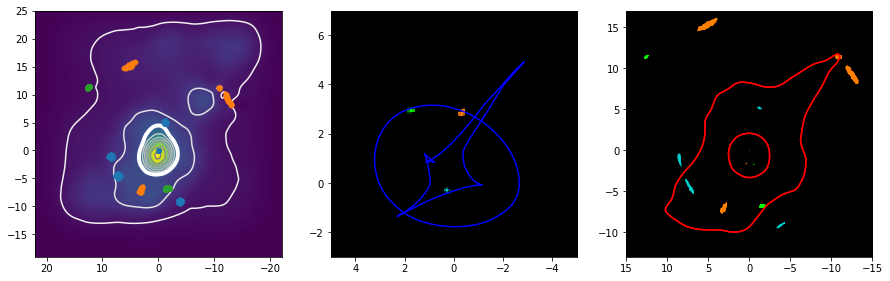

In [5]:
createPlots(li1, "model1")

Text(value='')

FloatProgress(value=0.0)

Text(value='')

FloatProgress(value=0.0)

Text(value='')

Text(value='')

Text(value='')

Text(value='')

Text(value='')

Text(value='')

Text(value='')

Text(value='')

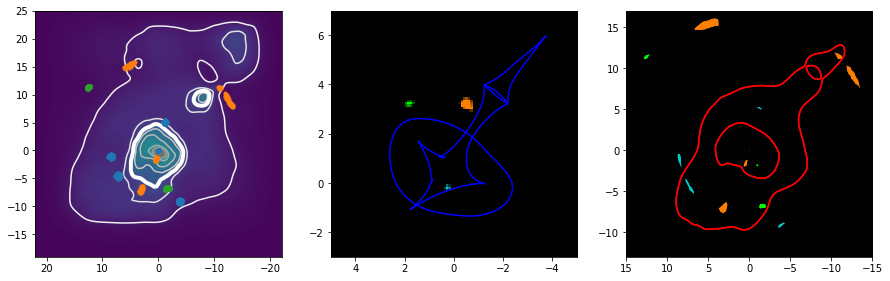

In [6]:
createPlots(li2, "model2")